# <font color=#6A2626> Predições de Vendas das Lojas Rossmann </font>

# <font color=#6A2626> Agenda </font>



1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão e Desmonstração
5. Próximos Passos

# <font color=#6A2626> 1. Contexto </font>

- Durante uma reunião mensal de resultados. O CFO solicitou uma previsão de vendas para as próximas 6 semanas de cada loja do Grupo Rossmann.

# <font color=#6A2626> 2. Sobre o Desafio </font>

## <font color=#6A2626> Qual é o Desafio? </font> 

- Definição do Budget para a Reforma das lojas.

## <font color=#6A2626> Possíveis Causas </font>

- Todas as previsões de vendas é feitas manualmente pelas 1.115 lojas Rossmann.
- O processo de predição de vendas é baseado em experiências passadas de cada loja.
- Predição de vendas atual apresentada algumas divergências.
- A visualização das vendas é limitada ao computador.

##  <font color=#6A2626>Solução do Desafio </font>

- Usar Machine Learning para realizar a previsão de vendas de todas as lojas.
- Visualização das predições de vendas poderão ser feitas pelo smartphone.

# <font color=#6A2626>3. Desenvolvimento da Solução </font>

##  <font color=#6A2626>Dimensão dos Dados</font>

In [97]:
print('Número de linhas: {}'.format(df1.shape[0]))
print('Número de colunas: {}'.format(df1.shape[1]))

Número de linhas: 1017209
Número de colunas: 20


## <font color=#6A2626> Estatística Descritiva </font>

In [98]:
#Central tendencian - mean, median

ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## <font color=#6A2626> Mapa das Hipóteses </font>

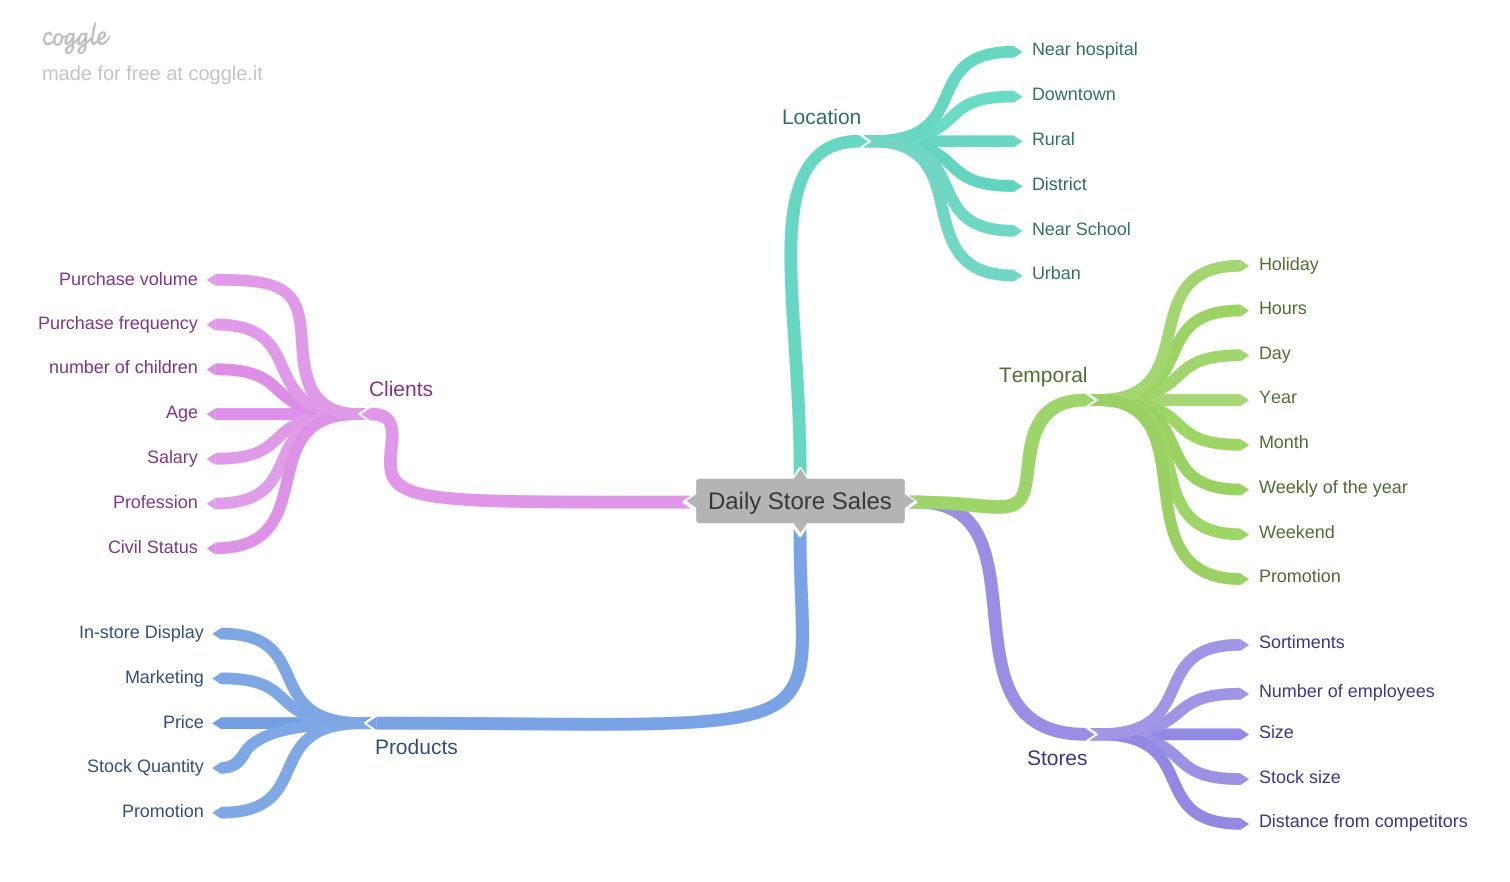

In [99]:
Image('/content/MindMapHypothesis.png')

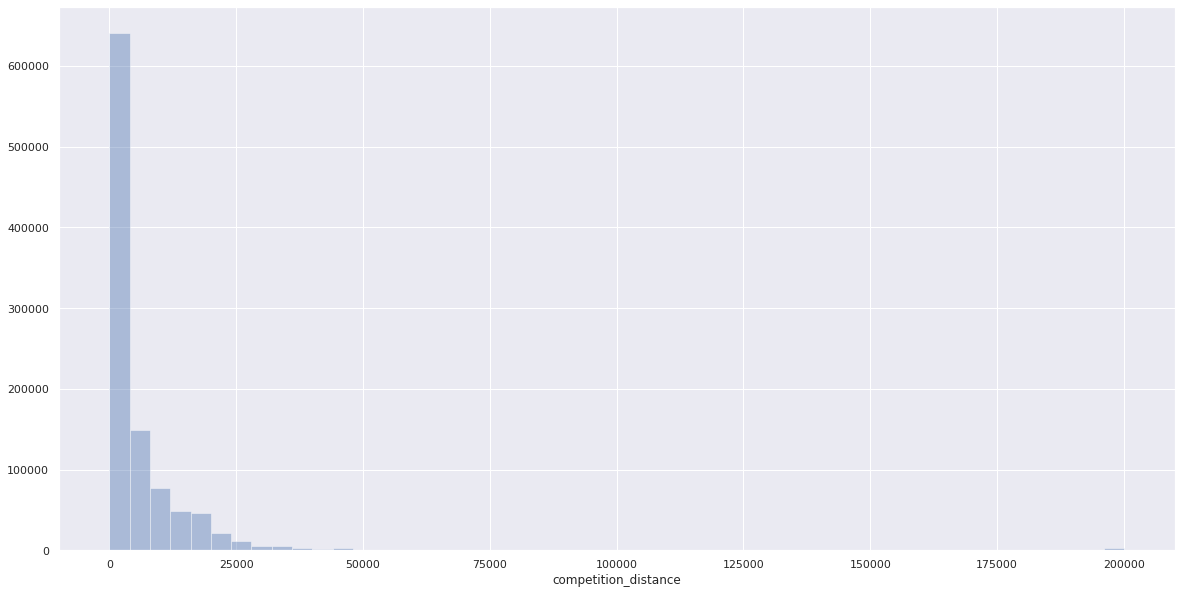

In [100]:
sns.distplot(df1['competition_distance'], kde= False);

## <font color=#6A2626> Hipóteses da Análise Exploratória </font>

**1-** Lojas com competidores mais próximos deveriam vender menos.

**2-** Lojas com maior sortimento deveriam vender mais.

**3-** Lojas com competidores à mais tempo  deveriam vender mais.

**4-** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5-** Lojas com mais dias de promoção deveriam vender mais.

**6-** Lojas com mais promoções consecutivas deveriam vender mais.


**7-** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8-** Lojas deveriam vender mais ao longo dos anos

**9-** Lojas deveriam vender mais no segundo semestre do ano.

**10-** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11-** Lojas deveriam vender menos aos finais de semana.

**12-** Lojas deveriam vender menos durante os feriados escolares

## <font color=#6A2626> Variáveis Numéricas </font>

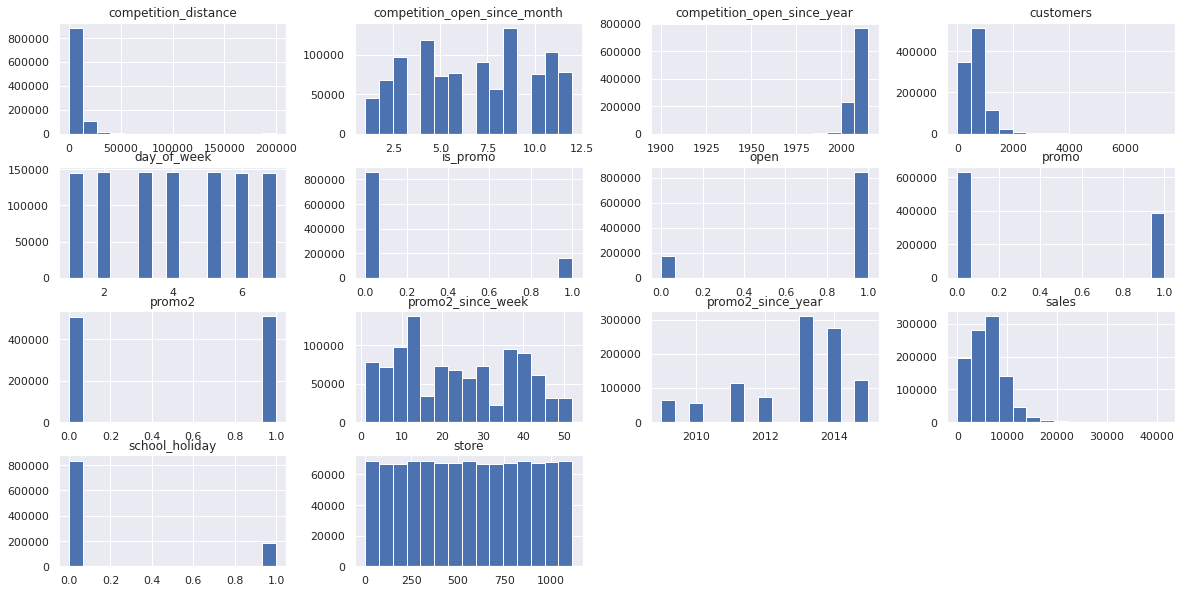

In [102]:
num_attributes.hist(bins=15);

## <font color=#6A2626> Variáveis Categóricas </font>

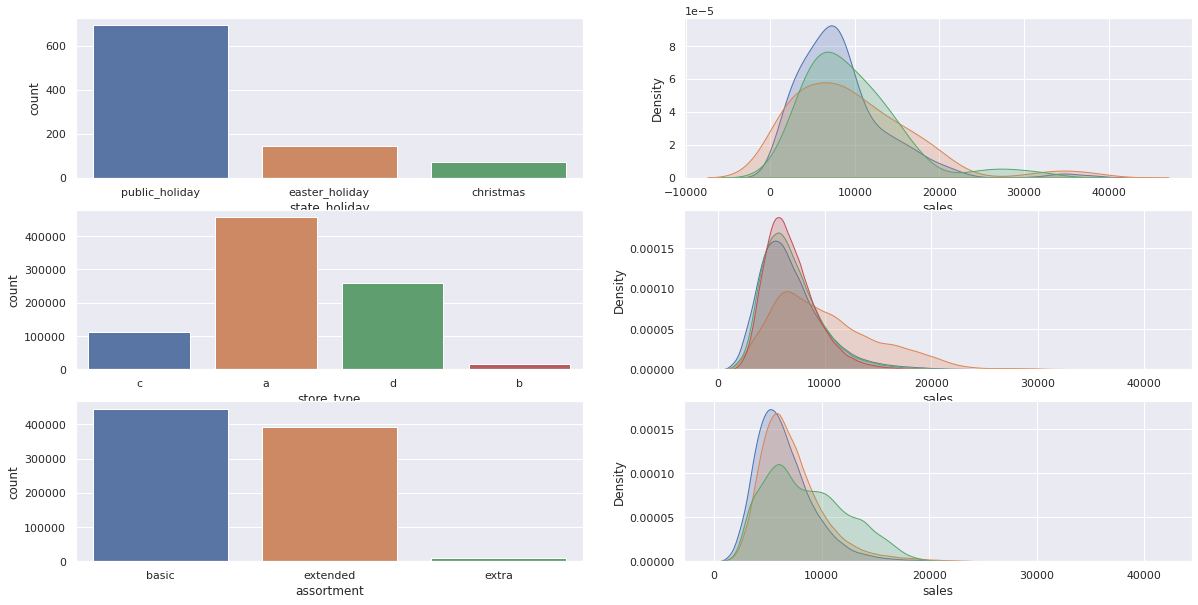

In [103]:
#state_holiday
a = df4[df4['state_holiday'] != 'regular_day']
plt.subplot(3,2,1)
sns.countplot(a['state_holiday']);

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'],label = 'public_holiday',shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'],label = 'easter_holiday',shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'],label = 'christmas',shade = True);

#store_type
plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'],label = 'a',shade = True);
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'],label = 'b',shade = True);
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'],label = 'c',shade = True);
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'],label = 'd',shade = True);

plt.subplot(3,2,3)
sns.countplot(df4['store_type']);

#assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment']);

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label  = 'basic', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade = True);

## <font color=#6A2626> Validação das Hípoteses </font>

###  Lojas com competidores mais próximos deveriam vender menos. 
 **Falsa** Lojas com competidores mais próximos vendem MAIS 

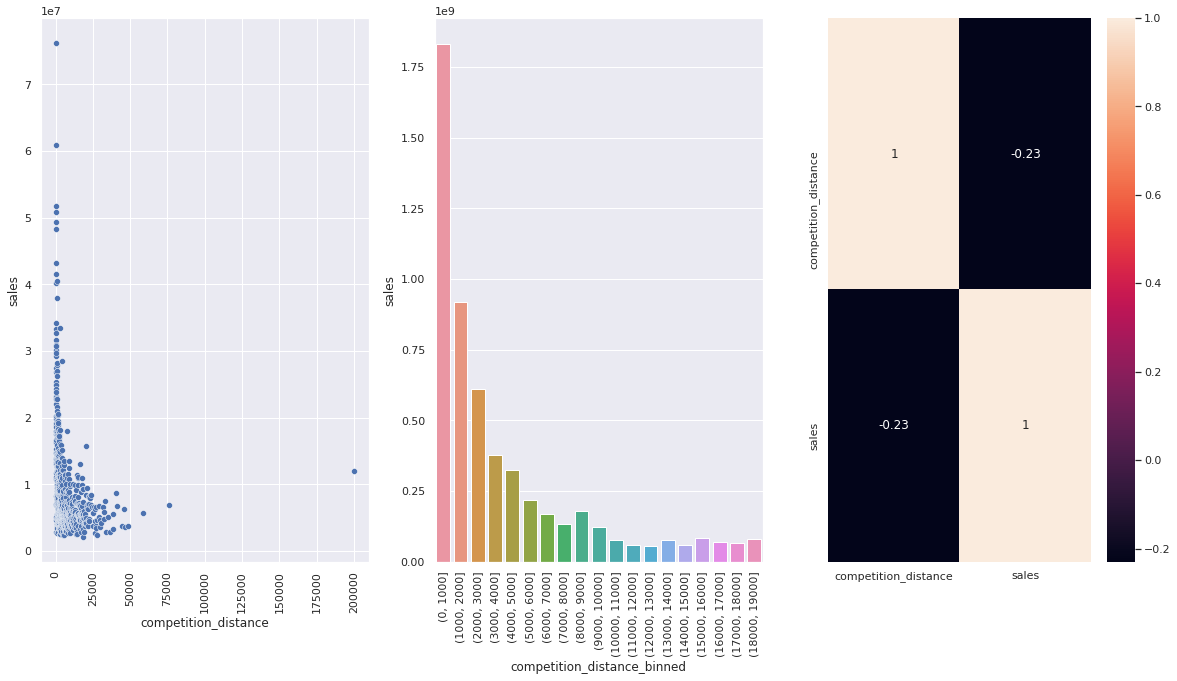

In [104]:
aux01= df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

#Plotagem de gráficos
plt.subplot(1,3,1)# Uma Linha, 3 colunas , Primeira Posição
sns.scatterplot(x='competition_distance', y='sales', data= aux01);
plt.xticks(rotation=90);

bins = list(np.arange(0,20000,1000))
aux01['competition_distance_binned'] = pd.cut(aux01['competition_distance'], bins= bins)
aux02= aux01[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()

plt.subplot(1,3,2) # Uma Linha, 3 colunas , Segunda Posição
sns.barplot(x='competition_distance_binned', y='sales', data= aux02);
plt.xticks(rotation=90);

plt.subplot(1,3,3) # Uma Linha, 3 colunas , Terceira Posição

corr = sns.heatmap(aux01.corr(method='pearson'),annot=True)
#bottom, top = corr.get_ylim()
#corr.set_ylim(bottom+0.5, top-0.5)

###  Lojas com promoções ativas por mais tempo deveriam vender mais.
**Falsa** Lojas com promoções ativas por mais tempo vendem MENOS

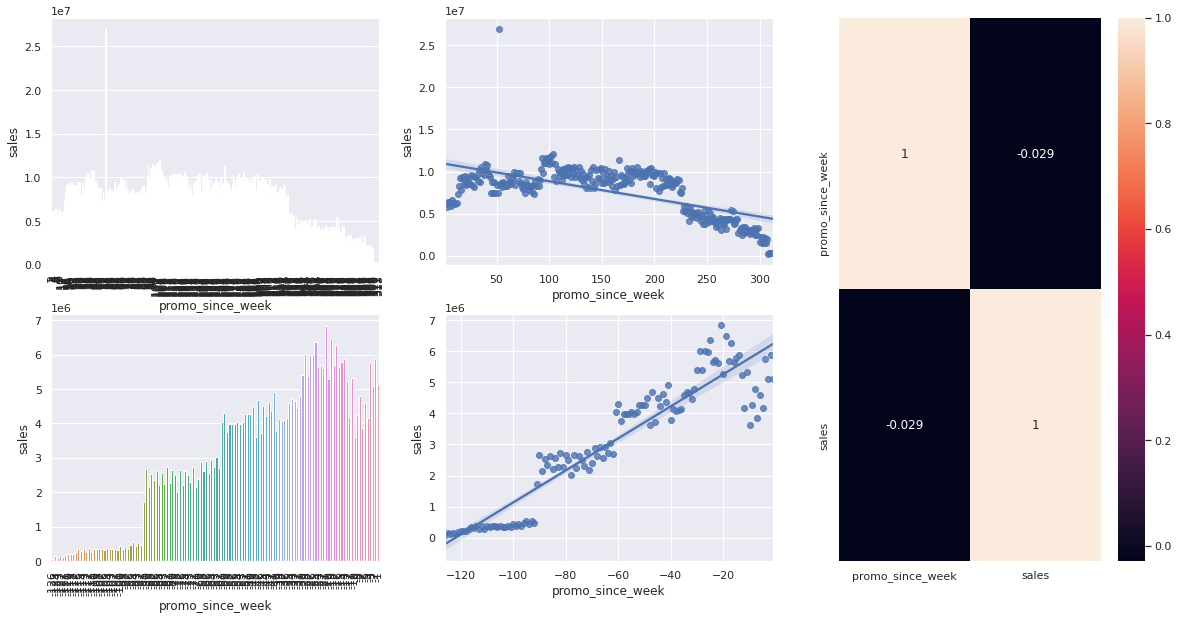

In [105]:
aux1= df4[['promo_since_week', 'sales']].groupby('promo_since_week').sum().reset_index()


grid =GridSpec(2,3)


plt.subplot(grid[ 0, 0])
aux2= aux1[aux1['promo_since_week'] > 0 ] #promo extendido
sns.barplot(x='promo_since_week', y= 'sales', data = aux2);
plt.xticks(rotation=90);

plt.subplot(grid[ 0, 1])
sns.regplot(x='promo_since_week', y= 'sales', data = aux2);


plt.subplot(grid[ 1, 0])
aux3= aux1[aux1['promo_since_week'] < 0 ] # promo regular
sns.barplot(x='promo_since_week', y= 'sales', data = aux3);
plt.xticks(rotation=90);

plt.subplot(grid[ 1, 1])
sns.regplot(x='promo_since_week', y= 'sales', data = aux3);

plt.subplot (grid[ :, 2])
sns.heatmap(aux1.corr(method='pearson'), annot=True);

###  Lojas com mais promoções consecutivas deveriam vender mais.
**Falsa** Lojas com mais promoções consecutivas vendem MENOS

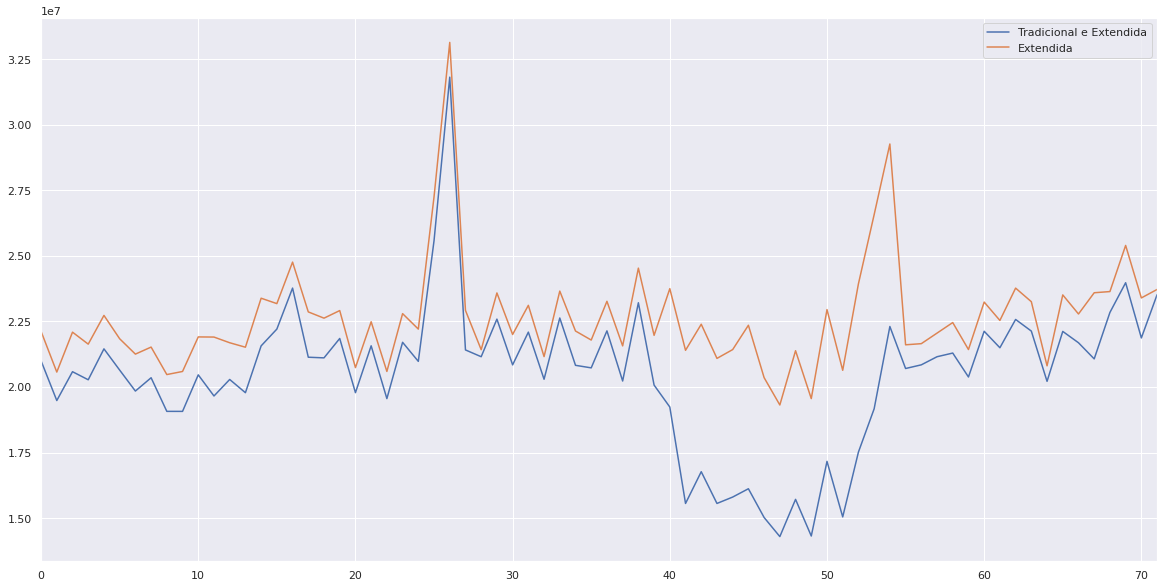

In [106]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot();

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax);

ax.legend(labels=['Tradicional e Extendida','Extendida']);

###  Lojas deveriam vender mais no segundo semestre do ano.
**Falsa** Lojas vendem MENOS no segundo semestre do ano

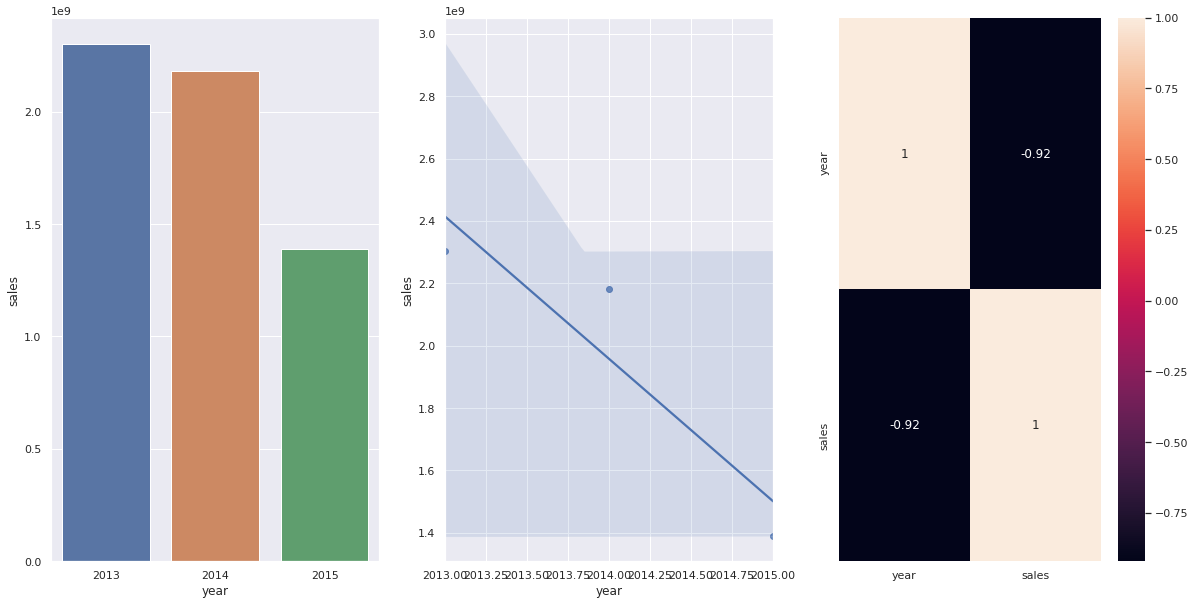

In [107]:
aux1 = df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year', y='sales', data= aux1);

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data= aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);



###  Lojas deveriam vender mais depois do dia 10 de cada mês.

**Verdadeira** 

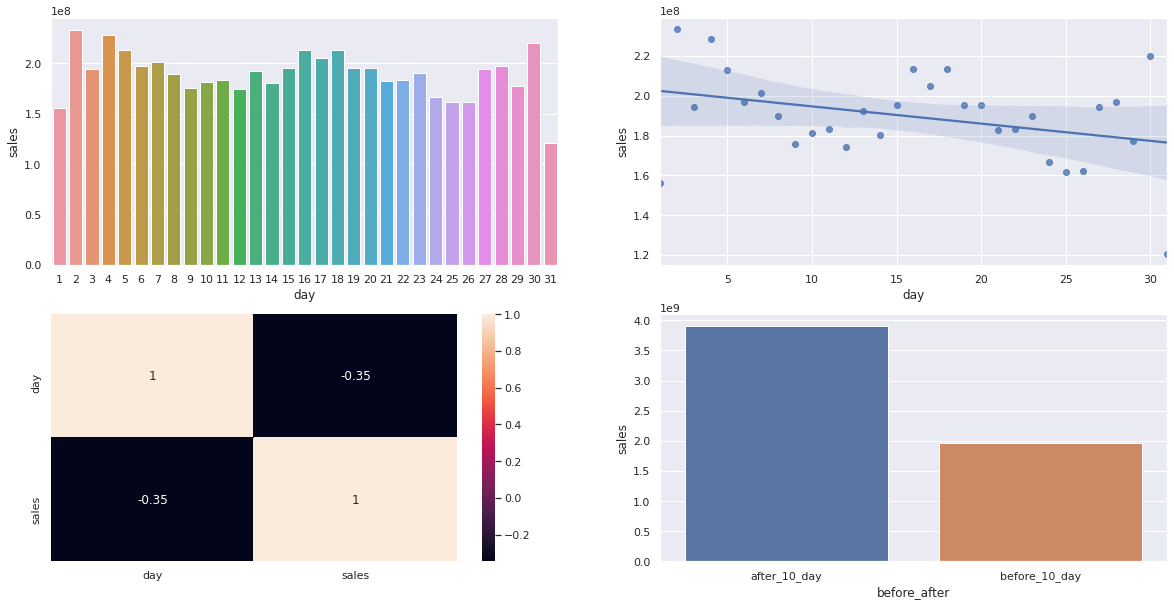

In [108]:
aux1 = df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day', y='sales', data= aux1);

plt.subplot(2,2,2)
sns.regplot(x='day', y='sales', data= aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True)

aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_day' if x <= 10 else 'after_10_day')
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

plt.subplot(2,2,4)
sns.barplot(x='before_after', y='sales', data= aux2);

## <font color=#6A2626> Resumo das Hipóteses </font>

In [128]:
tab =[['Hipotese', 'Conclusão','Relevância'],
       ['H1','Falsa', 'Baixa'],
       ['H2','Falsa', 'Média'],
       ['H3','Falsa', 'Média'],
       ['H4','Falsa', 'Baixa'],
       ['H5','---', '---'],
       ['H6','Falsa', 'Baixa'],
       ['H7','Falsa', 'Média'],
       ['H8','Falsa', 'Alta'], 
       ['H9','Falsa', 'Alta'], 
       ['H10','Verdadeira', 'Alta'],
       ['H11','Verdadeira', 'Alta'],
       ['H12','Verdadeira', 'Baixa'],
] 

print(tabulate(tab, headers='firstrow'))

Hipotese    Conclusão    Relevância
----------  -----------  ------------
H1          Falsa        Baixa
H2          Falsa        Média
H3          Falsa        Média
H4          Falsa        Baixa
H5          ---          ---
H6          Falsa        Baixa
H7          Falsa        Média
H8          Falsa        Alta
H9          Falsa        Alta
H10         Verdadeira   Alta
H11         Verdadeira   Alta
H12         Verdadeira   Baixa


## <font color=#6A2626> Análise Multivariadas </font>

### <font color=#6A2626> Atribultos Numéricos </font>

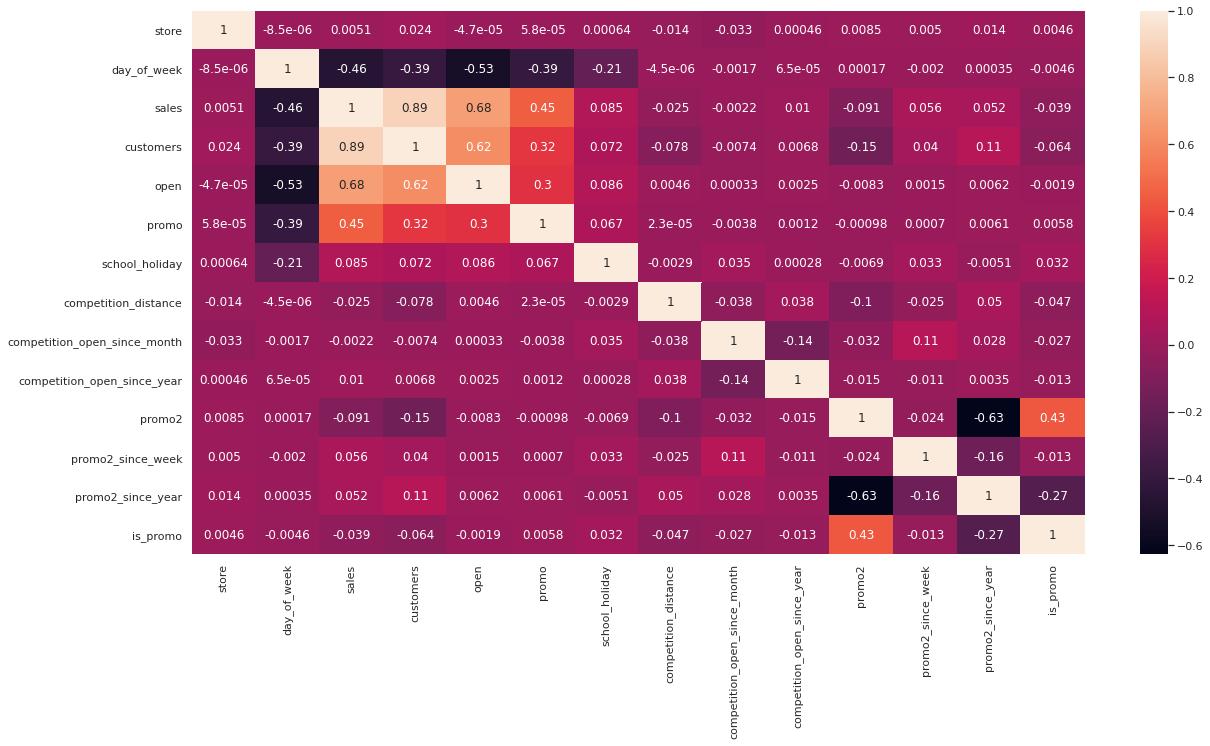

In [109]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### <font color=#6A2626> Atribultos Categóricos </font>

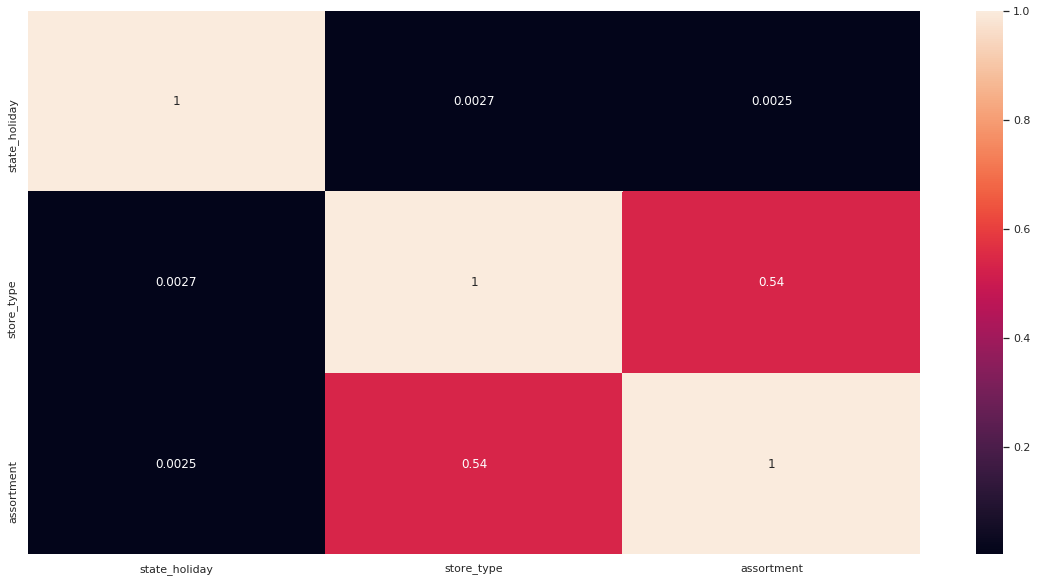

In [28]:
# only categorical data
a = df4.select_dtypes(include='object')

# Calculate cramer V
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

#Final Dataset

data = pd.DataFrame({'state_holiday':[a1,a2,a3],
                     'store_type':[a4,a5,a6],
                     'assortment':[a7,a8,a9]})

data = data.set_index(data.columns)
sns.heatmap(data,annot=True);

In [ ]:
# only categorical data
a = df4.select_dtypes(include='object')

# Calculate cramer V
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

#Final Dataset

data = pd.DataFrame({'state_holiday':[a1,a2,a3],
                     'store_type':[a4,a5,a6],
                     'assortment':[a7,a8,a9]})

data = data.set_index(data.columns)
sns.heatmap(data,annot=True);

## <font color=#6A2626> Preparação dos Dados </font>

In [111]:
rs = RobustScaler()
mms = MinMaxScaler()

#competition_distance (Robust)

df5['competition_distance'] = rs.fit_transform(df5[['competition_distance']].values)

#competition_time_month (Robust)

df5['competition_time_month'] = rs.fit_transform(df5[['competition_time_month']].values)

#year (Rescale)

df5['year'] = mms.fit_transform(df5[['year']].values)

#promo_since_week (Rescale)

df5['promo_since_week'] = mms.fit_transform(df5[['promo_since_week']].values)


## <font color=#6A2626> Transformação </font>


## <font color=#6A2626> Encoding </font> 

In [112]:
# state_holiday - One Hot Encoding

df5 = pd.get_dummies(df5,prefix=['state_holiday'], columns=['state_holiday'])

# store_type Label Encoding

le = LabelEncoder()
df5['store_type'] = le.fit_transform(df5['store_type'])

# assortment Ordinal Encoding

assortment_dict = {'basic':1,'extra':2,'extended':3}
df5['assortment'] = df5['assortment'].map(assortment_dict)

## <font color=#6A2626> Transformação da Variável Resposta </font>  

In [113]:
df5['sales']= np.log1p(df5['sales'])

## <font color=#6A2626> Transformação Natural </font>  

In [114]:
# Variáveis ciclicas (que sempre se repetem em um determinado tempo)

#month
df5['month_sin']= df5['month'].apply(lambda x: np.sin(x * (2. * np.pi/12) ) )
df5['month_cos']= df5['month'].apply(lambda x: np.cos(x * (2. * np.pi/12) ) )

#day
df5['day_sin']= df5['day'].apply(lambda x: np.sin(x * (2. * np.pi/30) ) )
df5['day_cos']= df5['day'].apply(lambda x: np.cos(x * (2. * np.pi/30) ) )

#week_of_year
df5['week_of_year_sin']= df5['week_of_year'].apply(lambda x: np.sin(x * (2. * np.pi/52) ) )
df5['week_of_year_cos']= df5['week_of_year'].apply(lambda x: np.cos(x * (2. * np.pi/52) ) )

#day_of_week
df5['day_of_week_sin']= df5['day_of_week'].apply(lambda x: np.sin(x * (2. * np.pi/7)) )
df5['day_of_week_cos']= df5['day_of_week'].apply(lambda x: np.cos(x * (2. * np.pi/7)) )

## <font color=#6A2626> Separação do Dataset</font>

In [115]:
#Training dataset
X_train = df5[df5['date'] < '2015-06-19']
y_train = X_train['sales']  

#Test dataset
X_test = df5[df5['date'] >= '2015-06-19']
y_test = X_test['sales']

print('Training Min date: {}'.format(X_train['date'].min()))
print('Training Max date: {}'.format(X_train['date'].max()))

print('\nTest Min date: {}'.format(X_test['date'].min()))
print('Test Max date: {}'.format(X_test['date'].max()))

Training Min date: 2013-01-01 00:00:00
Training Max date: 2015-06-18 00:00:00

Test Min date: 2015-06-19 00:00:00
Test Max date: 2015-07-31 00:00:00


## <font color=#6A2626> Seleção de Features </font>

In [ ]:
training and test dataset for Boruta

X_train_n = X_train.drop(['date','sales'],axis=1).values
y_train_n = y_train.values.ravel()

define RandomForest Regressor

rf = RandomForestRegressor(n_jobs=-1)

define Boruta

boruta = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=42).fit(X_train_n,y_train_n)

In [ ]:
#quando o Boruta terminar vamos usar as variáveis que ele rankiou de melhor relevância

cols_selected= boruta.support_.tolist()

#Best features 

X_train_fs = X_train.drop(['sales','date'], axis=1)
cols_selected_boruta = X_train_fs.iloc[:,cols_selected].columns.to_list()

#Not selected Boruta

cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta))

#Verificar as colunas selecionadas
cols_selected_boruta 
cols_not_selected_boruta 


## <font color=#6A2626>Features Selecionadas </font>

In [ ]:
cols_selected_boruta = ['store',
                        'promo',
                        'store_type',
                        'assortment',
                        'competition_distance',
                        'competition_open_since_month',
                        'competition_open_since_year',
                        'promo2','promo2_since_week',
                        'promo2_since_year',
                        'competition_time_month',
                        'promo_since_week',
                        'month_sin',
                        'month_cos',
                        'day_sin',
                        'day_cos',
                        'week_of_year_cos',
                        'day_of_week_sin', 
                        'day_of_week_cos']


# columns to add
feat_to_add = ['date','sales']

#final features
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend( feat_to_add )


## <font color=#6A2626>Machine Learning </font>

In [116]:
modelling_result_cv = pd.concat([lr_result_cv,lrr_result_cv,rf_result_cv,xgb_result_cv])
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2080.69+/-293.36,0.3+/-0.02,2950.49+/-464.71
0,Lasso,2116.38+/-341.5,0.29+/-0.01,3057.75+/-504.26
0,Random Forest Regressor,839.07+/-218.69,0.12+/-0.02,1257.83+/-320.83
0,XGBoost Regressor,1048.66+/-183.98,0.14+/-0.02,1511.8+/-257.32


## <font color=#6A2626>Hiperparâmetro (Fine Tuning) </font>

In [117]:
param = {
         'n_estimators':[1500,1700,2500,3000,3500],
         'eta':[0.01,0.03],
         'max_depth':[3,5,9],
         'subsample':[0.1,0.5,0.7],
         'colsample_bytee':[0.3,0.7,0.9],
         'min_child_weight':[3,8,15]
        }
MAX_EVAL = 5

In [ ]:
final_result = pd.DataFrame()

for i in range(MAX_EVAL):
    #choose values for parameters randomly
    hp = {k: random.sample(v,1)[0] for k,v in param.items()}
    print(hp)
    
    #model
    model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                                  n_estimators=hp['n_estimators'],
                                  eta=hp['eta'],
                                  max_depth=hp['max_depth'],
                                  subsample=hp['subsample'],
                                  colsample_bytee=hp['colsample_bytee'],
                                  min_child_weight = hp['min_child_weight'])


    #performance
    result = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
    final_result = pd.concat([final_result,result])

final_result

## <font color=#6A2626>Modelo Final </font>

In [85]:
 param_tuned = {
         'n_estimators':3000,
         'eta':0.03,
         'max_depth':5,
         'subsample':0.7,
         'colsample_bytree':0.7,
         'min_child_weight':3
        }

In [86]:
# #model
model_xgb_tuned = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators=param_tuned['n_estimators'],
                              eta=param_tuned['eta'],
                              max_depth=param_tuned['max_depth'],
                              subsample=param_tuned['subsample'],
                              colsample_bytree=param_tuned['colsample_bytree'],
                              min_child_weight =param_tuned['min_child_weight']).fit(x_train,y_train)

#prediction
yhat_xgb_tuned = model_xgb_tuned.predict(x_test)

#performance
 
xgb_result_tuned = ml_error('XGBoost Regressor Tuned',np.expm1(y_test),np.expm1(yhat_xgb_tuned))
xgb_result_tuned

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor Tuned,675.419295,0.099971,967.715559


# <font color=#6A2626> 4. Conclusão </font>

## <font color=#6A2626> Interpretação do Erro </font>

In [119]:
df9 = X_test[cols_selected_boruta_full]

#rescale
df9['sales'] = np.expm1(df9['sales'])
df9['predictions'] = np.expm1(yhat_xgb_tuned)

### <font color=#6A2626> Performace de Negócio </font>

In [90]:
#sum of predictions
df9_aux = df9[['store','predictions']].groupby('store').sum().reset_index()

#MAE and MAPE
df9_aux1 = df9[['store','predictions','sales']].groupby('store').apply(lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns={0:'MAE'})
df9_aux2 = df9[['store','predictions','sales']].groupby('store').apply(lambda x: mean_absolute_percentage_error(x['sales'],x['predictions'])).reset_index().rename(columns={0:'MAPE'})

#Merge
df9_aux3 = pd.merge(df9_aux1,df9_aux2,how='inner',on='store')
df9_aux4 = pd.merge(df9_aux,df9_aux3,how='inner',on='store')

#Scenarios

df9_aux4['worst_scenario'] = df9_aux4['predictions'] - df9_aux4['MAE']
df9_aux4['best_scenario'] = df9_aux4['predictions'] + df9_aux4['MAE']

#order columns

df9_aux4= df9_aux4[['store','predictions','worst_scenario','best_scenario','MAE','MAPE']]


In [91]:
df9_aux4.sort_values("MAPE", ascending = False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,105474.804688,102203.578536,108746.030839,3271.226151,0.560804
908,909,241753.250000,234186.343347,249320.156653,7566.906653,0.519045
875,876,200335.375000,196367.398968,204303.351032,3967.976032,0.300858
721,722,352965.312500,350974.250079,354956.374921,1991.062421,0.266647
273,274,191570.484375,190127.837686,193013.131064,1442.646689,0.250191


### <font color=#6A2626> Performace Total </font>

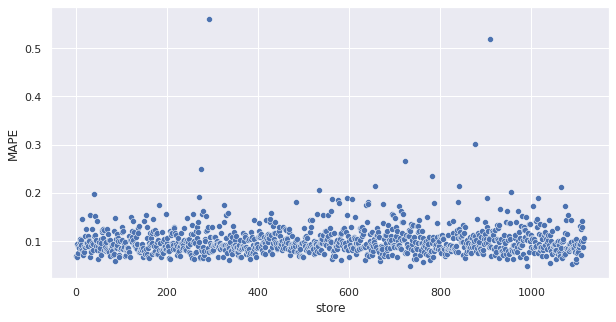

In [127]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'store',y = 'MAPE', data = df9_aux4);

In [123]:
df9_aux5 = df9_aux4[['predictions','worst_scenario','best_scenario']].apply(lambda x: np.sum(x),axis=0).reset_index().rename(columns={'index': 'Scenarios',0:'Values'})
df9_aux5['Values'] = df9_aux5['Values'].map('R${:,.2f}'.format)
df9_aux5



,Scenarios,Values
0,predictions,"R$287,872,185.41"
1,worst_scenario,"R$287,115,126.03"
2,best_scenario,"R$288,629,244.80"


### <font color=#6A2626> Performance Machine Learning </font>

In [124]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] /df9['sales']


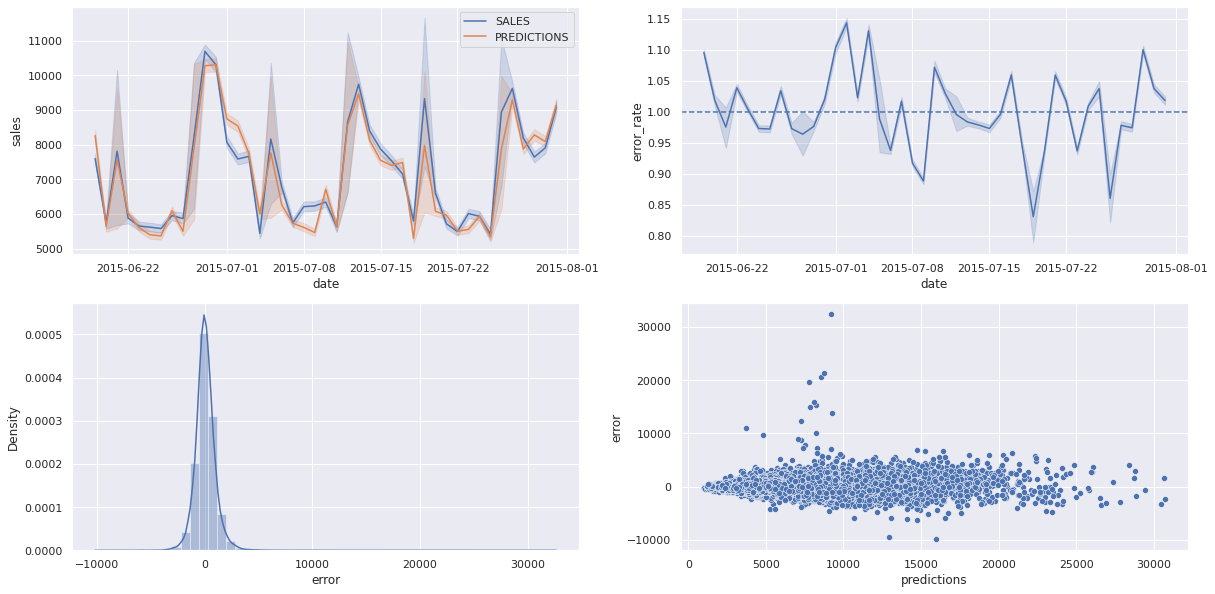

In [126]:
plt.subplot(2,2,1)
sns.lineplot(x='date',y='sales',data=df9,label='SALES');
sns.lineplot(x='date',y='predictions',data=df9,label='PREDICTIONS');

plt.subplot(2,2,2)
sns.lineplot(x='date',y='error_rate',data=df9);
plt.axhline(1,linestyle='--')

plt.subplot(2,2,3)
sns.distplot(df9['error']);

plt.subplot(2,2,4)
sns.scatterplot(df9['predictions'],df9['error']);


# <font color=#6A2626> 5. Próximos Passos </font>

- Coletar Feedbacks sobre a Usuabilidade do modelo.
- Traduzir a apresentação para inglês.
- Aumentar em 10% a Acurácia do Modelo.



# <font color=#6A2626> Q&A </font>

# <font color=#6A2626> Muito Obrigada! </font>